In [23]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [2]:
# load data
data = pd.read_csv('Lnfix.csv', encoding= 'utf-8')
data.head(20)

,artist,author,gernes,heart,name,star,view,words
0,None,Phantom Of The Moonlit Night,"Action,Adventure,Comedy,Fantasy,Harem,Seinen,S...",132,Running Away From The Hero! (Remake),5.0,4071,6986
1,Shizuma Yoshinori (しずまよしのり),Shuu (秋),"Action,Adventure,Comedy,Fantasy,Harem,Romance,...",6651,Maou Gakuin no Futekigousha ~Shijou Saikyou no...,4.8,5978437,636903
2,Fuumi,Itsuki Mizuho,"Adventure,Comedy,Fantasy,Slice of Life,Superna...",130,The Novice Alchemist's Store,5.0,7644,30539
3,Macchi | 마끼,이윤아,"Drama,Fantasy,Josei,Korean Novel,Mature,Romance",51,Lời Cầu Hôn Của Bạo Chúa,4.6,10419,43480
4,sime,cadet,"Action,Drama,Fantasy,Romance,School Life,Seine...",1832,"Ori of the Dragon Chain - ""Heart"" in the mind",4.8,358243,85317
5,Shirotaka,Rifujin na Magonote,"Action,Adventure,Fantasy,Harem,Isekai,Web Nove...",7051,Mushoku Tensei - Isekai Ittara Honki Dasu,4.9,12107698,1436669
6,Poko,Takehaya,"Action,Adventure,Comedy,Harem,Mecha,Slice of L...",2664,Rokujouma no Shinryakusha!?,4.9,2105928,2324415
7,Moran,리샤,"Adventure,Comedy,Fantasy,Korean Novel,Psycholo...",209,The baby raising a devil,4.9,33291,48322
8,Ryutetsu,Anikki Burazza,"Action,Adventure,Comedy,Fantasy,Harem,Martial ...",4479,Breakthrough with the Forbidden Master,4.9,3170603,398108
9,None,Nekoko,"Action,Adventure,Comedy,Fantasy,Slice of Life,...",3639,Tensei shitara doragon no tamago datta ~ saiky...,4.9,2884910,628000


In [3]:
df_1 = data['gernes']
df_1


0       Action,Adventure,Comedy,Fantasy,Harem,Seinen,S...
1       Action,Adventure,Comedy,Fantasy,Harem,Romance,...
2       Adventure,Comedy,Fantasy,Slice of Life,Superna...
3         Drama,Fantasy,Josei,Korean Novel,Mature,Romance
4       Action,Drama,Fantasy,Romance,School Life,Seine...
                              ...                        
1945                                Romance,Slice of Life
1946    Action,Adventure,Comedy,Fantasy,Harem,Mystery,...
1947    Adult,Comedy,Ecchi,Harem,Mature,Romance,School...
1948    Action,Ecchi,Fantasy,Harem,Super Power,Adult,I...
1949                                    Adventure,Fantasy
Name: gernes, Length: 1950, dtype: object

In [4]:
# Đếm có bao nhiêu Ln/ WN thuộc thể loại Action, Comedy
count = 0
for i in df_1:
  isAction = False 
  isComedy = False
  t = i.split(',') # chuyển string thành list. Ex: 'a, b, c' -> ['a', 'b', c'']
  for x in t:
    x = x.strip() # xoá khoảng trắng đầu và cuối kí tự ex: ' a' or 'a ' -> 'a'
    if x == 'Comedy':
      isComedy = True
    if x == 'Action':
      isAction = True
  if isComedy == True and isAction == True:
    count += 1
print(count)
      

481


In [5]:
# Đếm có bao nhiêu truyện thuộc thể loại Romance
count = 0
for i in df_1:
  isRomance = False
  t = i.split(',')
  for x in t:
    x = x.strip()
    if x == 'Romance':
      isRomance = True
  if isRomance == True:
    count+=1
  
print(count)

1191


In [6]:
# list các thể loại truyện
gernes = []
for i in df_1:
  t = i.split(',')
  for x in t:
    x = x.strip()
    if x not in gernes:
      gernes.append(x)

In [7]:
gernes.sort() # sắp xếp theo bảng chữ cái
print(gernes)
print(len(gernes))

['Action', 'Adapted to Anime', 'Adapted to Drama CD', 'Adapted to Manga', 'Adult', 'Adventure', 'Chinese Novel', 'Comedy', 'Cooking', 'Drama', 'Ecchi', 'English Novel', 'Fantasy', 'Game', 'Gender Bender', 'Harem', 'Historical', 'Horror', 'Incest', 'Isekai', 'Josei', 'Korean Novel', 'Magic', 'Martial Arts', 'Mature', 'Mecha', 'Military', 'Mystery', 'Netorare', 'One shot', 'Otome Game', 'Psychological', 'Reverse Harem', 'Romance', 'School Life', 'Science Fiction', 'Seinen', 'Shoujo', 'Shoujo ai', 'Shounen', 'Shounen ai', 'Slice of Life', 'Sports', 'Super Power', 'Supernatural', 'Suspense', 'Tragedy', 'Web Novel', 'Yuri']
49


In [8]:
# số truyện có có trong từng thể loại
gernes_count =[]
def gerne_count(X):
  count = 0
  for i in df_1:
    isA = False
    t = i.split(',')
    for x in t:
      x = x.strip()
      if x == X:
        isA = True
    if isA == True:
      count+=1
  return count
for i in gernes:
  gernes_count.append(gerne_count(i))


In [9]:
print(gernes_count)


[941, 64, 17, 205, 105, 834, 54, 1028, 23, 633, 329, 2, 1195, 58, 86, 618, 43, 90, 17, 333, 46, 132, 213, 64, 182, 44, 43, 203, 6, 76, 31, 215, 6, 1191, 511, 117, 212, 145, 75, 273, 9, 532, 3, 156, 340, 18, 214, 568, 53]


In [18]:
Type = []
for i in data['words']:
  if i <= 20000:
    Type.append('Low')
  elif 20000 < i <= 70000:
    Type.append('Medium')
  elif 70000 < i <= 150000:
    Type.append('High')
  elif 150000 < i <= 300000:
    Type.append('Super_High')
  else:
    Type.append('Mega_High') 
data1 = data.copy()
data1.insert(8, 'Type_words', Type)
data1.head(10)

,artist,author,gernes,heart,name,star,view,words,Type_words
0,None,Phantom Of The Moonlit Night,"Action,Adventure,Comedy,Fantasy,Harem,Seinen,S...",132,Running Away From The Hero! (Remake),5.0,4071,6986,Low
1,Shizuma Yoshinori (しずまよしのり),Shuu (秋),"Action,Adventure,Comedy,Fantasy,Harem,Romance,...",6651,Maou Gakuin no Futekigousha ~Shijou Saikyou no...,4.8,5978437,636903,Mega_High
2,Fuumi,Itsuki Mizuho,"Adventure,Comedy,Fantasy,Slice of Life,Superna...",130,The Novice Alchemist's Store,5.0,7644,30539,Medium
3,Macchi | 마끼,이윤아,"Drama,Fantasy,Josei,Korean Novel,Mature,Romance",51,Lời Cầu Hôn Của Bạo Chúa,4.6,10419,43480,Medium
4,sime,cadet,"Action,Drama,Fantasy,Romance,School Life,Seine...",1832,"Ori of the Dragon Chain - ""Heart"" in the mind",4.8,358243,85317,High
5,Shirotaka,Rifujin na Magonote,"Action,Adventure,Fantasy,Harem,Isekai,Web Nove...",7051,Mushoku Tensei - Isekai Ittara Honki Dasu,4.9,12107698,1436669,Mega_High
6,Poko,Takehaya,"Action,Adventure,Comedy,Harem,Mecha,Slice of L...",2664,Rokujouma no Shinryakusha!?,4.9,2105928,2324415,Mega_High
7,Moran,리샤,"Adventure,Comedy,Fantasy,Korean Novel,Psycholo...",209,The baby raising a devil,4.9,33291,48322,Medium
8,Ryutetsu,Anikki Burazza,"Action,Adventure,Comedy,Fantasy,Harem,Martial ...",4479,Breakthrough with the Forbidden Master,4.9,3170603,398108,Mega_High
9,None,Nekoko,"Action,Adventure,Comedy,Fantasy,Slice of Life,...",3639,Tensei shitara doragon no tamago datta ~ saiky...,4.9,2884910,628000,Mega_High


In [11]:
# bảng thống kê % words
x = data1.groupby('Type_words')['Type_words'].count() # tạo nhóm dữ liệu theo cột Type_words
x = pd.DataFrame(x) # chuyển thành dataframe
x.columns = ['Percent'] # chuyển cột với index là Percent
type_inc = x/sum(x['Percent'])*100
type_inc


,Percent
Type_words,
High,13.487179
Low,45.128205
Medium,28.358974
Mega_High,5.589744
Super_High,7.435897


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

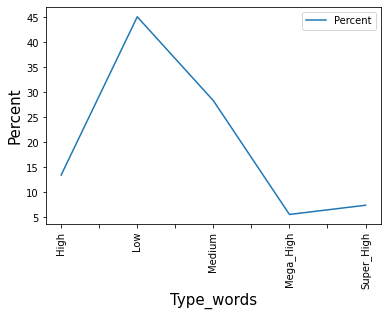

In [12]:
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Type_words', fontsize=15)
plt.ylabel('Percent', fontsize=15)

In [19]:
Type_view = []
for i in data1['view']:
  if i <= 20000:
    Type_view.append('Low')
  elif 20000 < i <= 70000:
    Type_view.append('Medium')
  elif 70000 < i <= 150000:
    Type_view.append('High')
  elif 150000 < i <= 300000:
    Type_view.append('Super_High')
  else:
    Type_view.append('Mega_High') 
data1['Type_view'] = pd.Series(Type_view)

In [20]:
# bảng thống kê % view
x = data1.groupby('Type_view')['Type_view'].count() # tạo nhóm dữ liệu theo cột Type_words
x = pd.DataFrame(x) # chuyển thành dataframe
x.columns = ['Percent'] # chuyển cột với index là Percent
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
Type_view,
High,13.333333
Low,32.512821
Medium,36.256410
Mega_High,9.743590
Super_High,8.153846


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

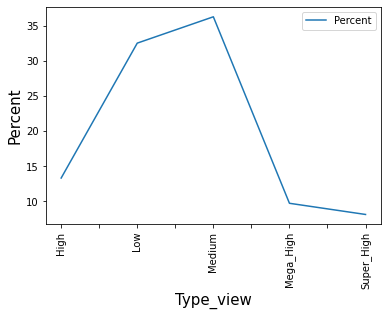

In [21]:
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Type_view', fontsize=15)
plt.ylabel('Percent', fontsize=15)

### Xem tổng quát dữ liệu

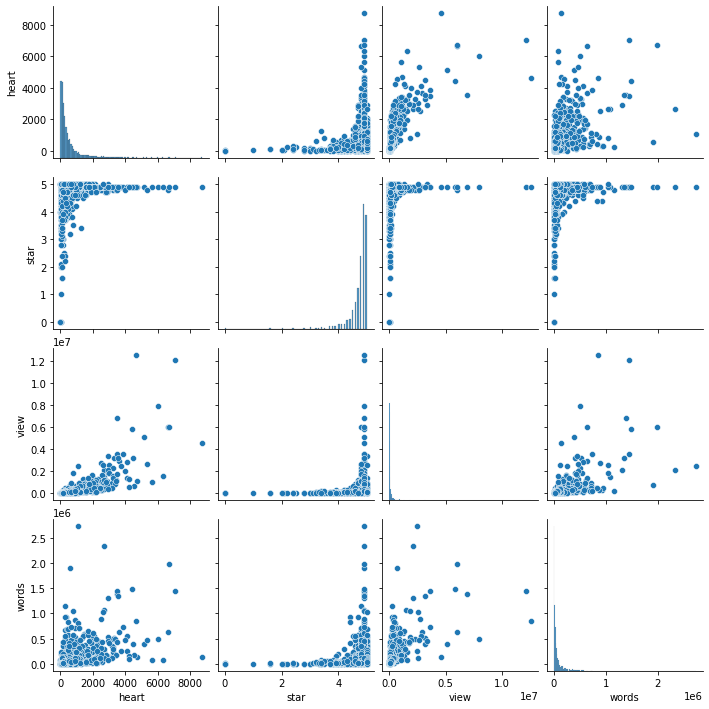

In [24]:
sns.pairplot(data)

### Tìm max, min và độ lệch chuẩn của dữ liệu

In [25]:
min_value = data.min(skipna = True, numeric_only= True)
print(min_value)
print('-'*50)

heart       7.0
star        0.0
view     1055.0
words     484.0
dtype: float64
--------------------------------------------------


In [26]:
max_value = data.max(skipna = True, numeric_only= True)
print(max_value)
print('-'*50)

heart        8731.0
star            5.0
view     12579395.0
words     2725961.0
dtype: float64
--------------------------------------------------


In [27]:
print('Phạm vi của dữ liệu:')
print(max_value - min_value)
print('-'*50)

Phạm vi của dữ liệu:
heart        8724.0
star            5.0
view     12578340.0
words     2725477.0
dtype: float64
--------------------------------------------------


In [29]:
# độ lệch chuẩn
print('Độ lệch chuẩn của data:')
data.std(skipna=True)

Độ lệch chuẩn của data:


heart       775.263210
star          0.431635
view     625655.299411
words    176223.640507
dtype: float64

## Tương quan giữa số lượt xem và số lượng chữ

Text(0, 0.5, 'Count')

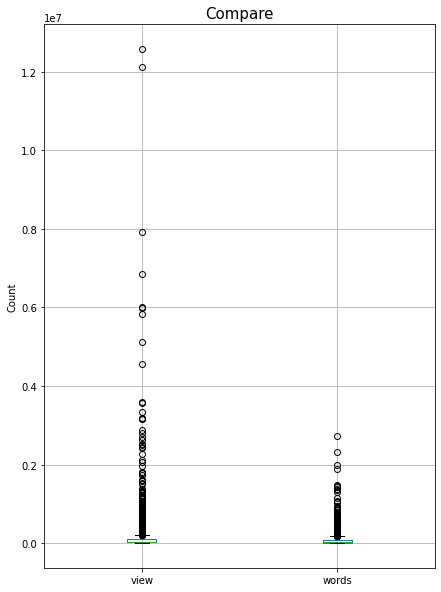

In [28]:
plt.figure(figsize=(7,10))
plt.title('Compare', fontsize = 15)
data[['view', 'words']].boxplot()
plt.ylabel('Count')